In [7]:
import pandas as pd

file_path = r"https://raw.githubusercontent.com/ajayt0m/Ensemble-Techniques/main/Pistachio_28_Features_Dataset.xlsx"

pistachio_df = pd.read_excel(file_path)

In [8]:
pistachio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

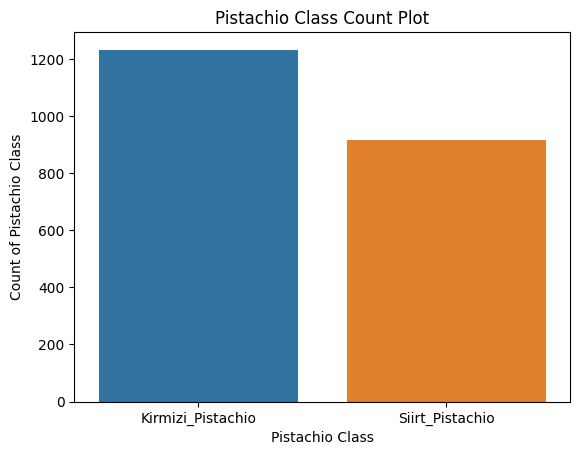

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=pistachio_df, x="Class")
plt.xlabel("Pistachio Class")
plt.ylabel("Count of Pistachio Class")
plt.title("Pistachio Class Count Plot")
plt.show()

In [12]:
X = pistachio_df.iloc[:,:-1]
y = pistachio_df.iloc[:,-1]

In [13]:
X.shape

(2148, 28)

In [14]:
y.shape

(2148,)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=36)

In [34]:
X_train.shape

(1611, 28)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion="gini", 
                             max_depth=8,
                             min_samples_split=10,
                             random_state=5)

In [17]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [18]:
rfc.feature_importances_

array([0.05835129, 0.00934188, 0.01283348, 0.14668885, 0.0627151 ,
       0.05203053, 0.00939367, 0.03101613, 0.00731768, 0.05180489,
       0.01179754, 0.0853489 , 0.14927135, 0.00397548, 0.11015278,
       0.02837221, 0.0170084 , 0.01464006, 0.00688734, 0.02445322,
       0.01195833, 0.01496411, 0.01610698, 0.02548533, 0.00953048,
       0.00743474, 0.01013382, 0.01098542])

In [19]:
pistachio_df.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [20]:
y_pred = rfc.predict(X_test)

In [21]:
y_pred

array(['Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Siirt_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Siirt_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Siirt_Pistachio', 'Kirmizi_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', '

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[306,  26],
       [ 37, 168]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.88268156424581

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,X_train,y_train,cv=10)

array([0.95061728, 0.89440994, 0.86335404, 0.89440994, 0.85093168,
       0.92546584, 0.93167702, 0.91304348, 0.89440994, 0.8757764 ])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.89      0.92      0.91       332
  Siirt_Pistachio       0.87      0.82      0.84       205

         accuracy                           0.88       537
        macro avg       0.88      0.87      0.87       537
     weighted avg       0.88      0.88      0.88       537



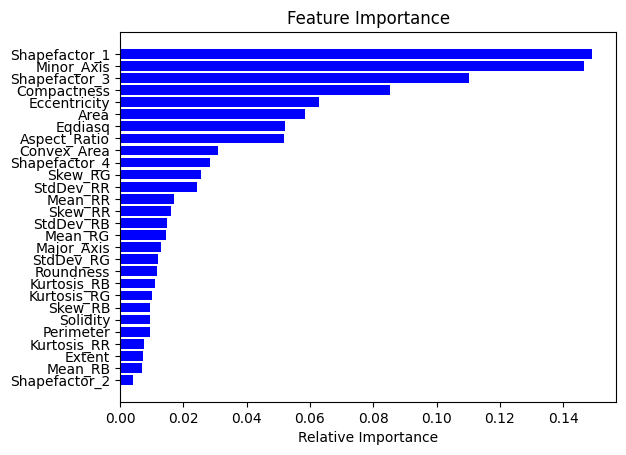

In [27]:
import numpy as np

features = pistachio_df.columns
importance = rfc.feature_importances_
indices = np.argsort(importance)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()